# Dataset generalization

## For every considered model, meta-learn on 16-dimensional halfspace dataset, then transfer rules, and train / test that on MNIST.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 1:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,
                          update_all_edges=True)
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 16  # Input layer size for meta-learning.
n_down = 28 * 28  # Input layer size for desired task training.
m_up = 2  # Output layer size for meta-learning.
m_down = 10  # Output layer size for desired task training.
w = 100  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 50  # Number of nodes firing per layer.

# Training config.
num_runs = 2
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = False
dataset_up = 'halfspace'
dataset_down = 'mnist'

In [3]:
# Instantiate brain factories.
brain_prepost_l2_up_fact = lambda: FFLocalNet(
    n_up, m_up, 2, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_l2_down_fact = lambda: FFLocalNet(
    n_down, m_down, 2, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)
brain_prepost_l3_up_fact = lambda: FFLocalNet(
    n_up, m_up, 3, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_l3_down_fact = lambda: FFLocalNet(
    n_down, m_down, 3, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)

brain_prepostcount_l2_up_fact = lambda: FFLocalNet(
    n_up, m_up, 2, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_l2_down_fact = lambda: FFLocalNet(
    n_down, m_down, 2, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)
brain_prepostcount_l3_up_fact = lambda: FFLocalNet(
    n_up, m_up, 3, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_l3_down_fact = lambda: FFLocalNet(
    n_down, m_down, 3, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate models.
print('==== Interpretation: PrePost, 2 hidden layers (universal) ====')
stats_prepost_l2_up, stats_prepost_l2_down = evaluate_up_down(
    brain_prepost_l2_up_fact, brain_prepost_l2_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePost, 3 hidden layers (universal) ====')
stats_prepost_l3_up, stats_prepost_l3_down = evaluate_up_down(
    brain_prepost_l3_up_fact, brain_prepost_l3_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: PrePost, 2 hidden layers (universal) ====

Run 1 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:19<00:00,  2.79s/it]


Last loss: 0.4627
Last train accuracy: 0.8047
Last test accuracy: 0.7640
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9392
Last train accuracy: 0.5363
Last test accuracy: 0.5453


Run 2 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:09<00:00,  2.60s/it]


Last loss: 0.4351
Last train accuracy: 0.8693
Last test accuracy: 0.8560
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.8972
Last train accuracy: 0.5597
Last test accuracy: 0.5697

==== Interpretation: PrePost, 3 hidden layers (universal) ====

Run 1 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:43<00:00,  4.48s/it]


Last loss: 0.5338
Last train accuracy: 0.7580
Last test accuracy: 0.7440
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9432
Last train accuracy: 0.5302
Last test accuracy: 0.5335


Run 2 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:37<00:00,  4.34s/it]


Last loss: 0.6079
Last train accuracy: 0.7413
Last test accuracy: 0.7620
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


100%|██████████| 60000/60000 [07:30<00:00, 133.32it/s]


Last loss: 2.2712
Last train accuracy: 0.2113
Last test accuracy: 0.2132



In [5]:
print('==== Interpretation: PrePostCount, 2 hidden layers (universal) ====')
stats_prepostcount_l2_up, stats_prepostcount_l2_down = evaluate_up_down(
    brain_prepostcount_l2_up_fact, brain_prepostcount_l2_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: PrePostCount, 3 hidden layers (universal) ====')
stats_prepostcount_l3_up, stats_prepostcount_l3_down = evaluate_up_down(
    brain_prepostcount_l3_up_fact, brain_prepostcount_l3_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: PrePostCount, 2 hidden layers (universal) ====

Run 1 / 2...
Meta-learning on halfspace...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.4937
Last train accuracy: 0.7373
Last test accuracy: 0.6940
Final upstream test acc 0.6940 not high enough, retrying...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:15<00:00,  2.71s/it]


Last loss: 0.4609
Last train accuracy: 0.8047
Last test accuracy: 0.8080
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9972
Last train accuracy: 0.4673
Last test accuracy: 0.4688


Run 2 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:11<00:00,  2.63s/it]


Last loss: 0.4591
Last train accuracy: 0.8187
Last test accuracy: 0.7980
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9252
Last train accuracy: 0.5397
Last test accuracy: 0.5489

==== Interpretation: PrePostCount, 3 hidden layers (universal) ====

Run 1 / 2...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:41<00:00,  4.43s/it]


Last loss: 0.5298
Last train accuracy: 0.7287
Last test accuracy: 0.7320
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.0012
Last train accuracy: 0.4823
Last test accuracy: 0.4923


Run 2 / 2...
Meta-learning on halfspace...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.6530
Last train accuracy: 0.5040
Last test accuracy: 0.5280
Final upstream test acc 0.5280 not high enough, retrying...
Meta-learning on halfspace...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.5640
Last train accuracy: 0.6947
Last test accuracy: 0.6980
Final upstream test acc 0.6980 not high enough, retrying...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Last loss: 0.5323
Last train accuracy: 0.7167
Last test accuracy: 0.7300
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


100%|██████████| 60000/60000 [07:16<00:00, 137.57it/s]


Last loss: 1.9312
Last train accuracy: 0.5046
Last test accuracy: 0.5152



Saving figure to: figs/generalization_fast_prepost_l2_uni_halfspace_mnist


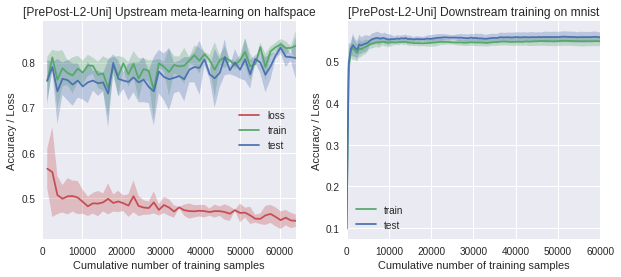

Mean essential stats across all runs:
Last upstream loss: 0.4489
Last upstream train accuracy: 0.8370
Last upstream test accuracy: 0.8100
Last downstream loss: 1.9182
Last downstream train accuracy: 0.5480
Last downstream test accuracy: 0.5575

Saving figure to: figs/generalization_fast_prepost_l3_uni_halfspace_mnist


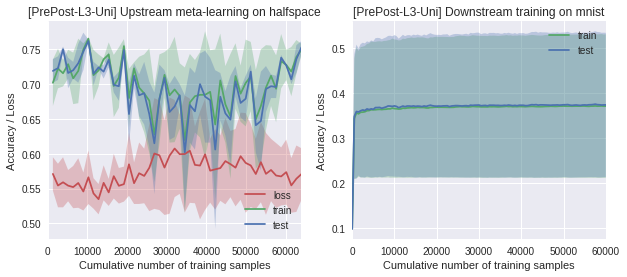

Mean essential stats across all runs:
Last upstream loss: 0.5708
Last upstream train accuracy: 0.7497
Last upstream test accuracy: 0.7530
Last downstream loss: 2.1072
Last downstream train accuracy: 0.3707
Last downstream test accuracy: 0.3733



In [6]:
# Plot aggregated stats.
agg_stats_prepost_l2_up = convert_multi_stats_uncertainty(stats_prepost_l2_up)
agg_stats_prepost_l2_down = convert_multi_stats_uncertainty(stats_prepost_l2_down)
plot_curves(agg_stats_prepost_l2_up, agg_stats_prepost_l2_down,
            '[PrePost-L2-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePost-L2-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_fast_prepost_l2_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepost_l3_up = convert_multi_stats_uncertainty(stats_prepost_l3_up)
agg_stats_prepost_l3_down = convert_multi_stats_uncertainty(stats_prepost_l3_down)
plot_curves(agg_stats_prepost_l3_up, agg_stats_prepost_l3_down,
            '[PrePost-L3-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePost-L3-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_fast_prepost_l3_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

Saving figure to: figs/generalization_fast_prepostcount_l2_uni_halfspace_mnist


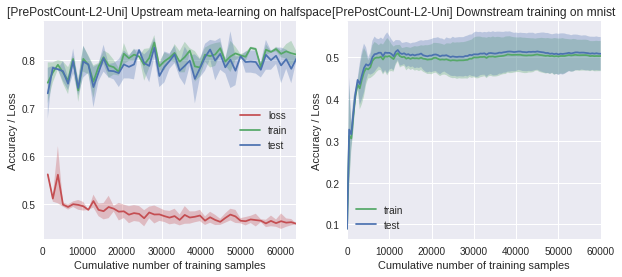

Mean essential stats across all runs:
Last upstream loss: 0.4600
Last upstream train accuracy: 0.8117
Last upstream test accuracy: 0.8030
Last downstream loss: 1.9612
Last downstream train accuracy: 0.5035
Last downstream test accuracy: 0.5089

Saving figure to: figs/generalization_fast_prepostcount_l3_uni_halfspace_mnist


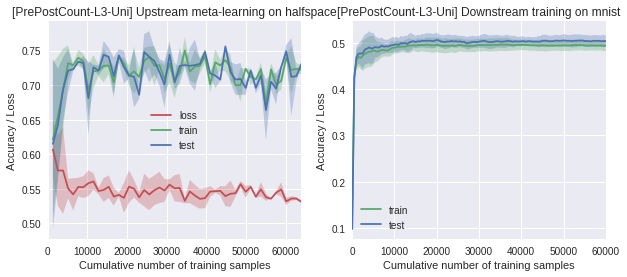

Mean essential stats across all runs:
Last upstream loss: 0.5311
Last upstream train accuracy: 0.7227
Last upstream test accuracy: 0.7310
Last downstream loss: 1.9662
Last downstream train accuracy: 0.4935
Last downstream test accuracy: 0.5038



In [7]:
agg_stats_prepostcount_l2_up = convert_multi_stats_uncertainty(stats_prepostcount_l2_up)
agg_stats_prepostcount_l2_down = convert_multi_stats_uncertainty(stats_prepostcount_l2_down)
plot_curves(agg_stats_prepostcount_l2_up, agg_stats_prepostcount_l2_down,
            '[PrePostCount-L2-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount-L2-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_fast_prepostcount_l2_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)
agg_stats_prepostcount_l3_up = convert_multi_stats_uncertainty(stats_prepostcount_l3_up)
agg_stats_prepostcount_l3_down = convert_multi_stats_uncertainty(stats_prepostcount_l3_down)
plot_curves(agg_stats_prepostcount_l3_up, agg_stats_prepostcount_l3_down,
            '[PrePostCount-L3-Uni] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount-L3-Uni] Downstream training on ' + dataset_down,
            'figs/generalization_fast_prepostcount_l3_uni_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

## Train vanilla net

In [9]:
# Instantiate model.
brain_vanilla = FFBrainNet(
    n_down, m_down, 2, w, p, cap, full_gd=True)

In [10]:
# Evaluate model.
print('==== Vanilla ====')
X_train, y_train, X_test, y_test = quick_get_data('mnist', 28 * 28)
print('Training VANILLA brain instance (WITH backprop) on mnist...')
stats_vanilla = train_downstream(
    X_train, y_train, brain_vanilla, num_epochs=num_epochs_downstream,
    batch_size=256, vanilla=True, learn_rate=5e-3,
    X_test=X_test, y_test=y_test, verbose=False, stats_interval=500)

==== Vanilla ====
mnist_train: 60000
mnist_test: 10000
Training VANILLA brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.1385
INITIAL test accuracy: 0.1415
Epoch 1 / 1 ...


100%|██████████| 234/234 [00:58<00:00,  3.98it/s]


Last loss: 1.6566
Last train accuracy: 0.8109
Last test accuracy: 0.8048


Saving figure to: figs/generalization_fast_vanilla_mnist


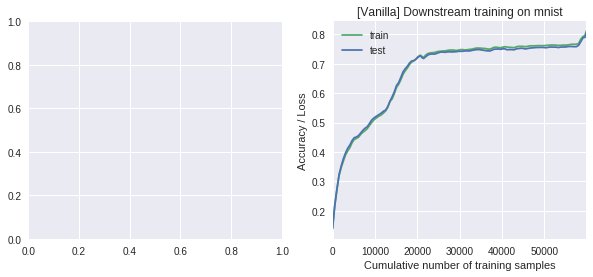

Mean essential stats across all runs:
Last downstream loss: 1.6566
Last downstream train accuracy: 0.8109
Last downstream test accuracy: 0.8048



In [11]:
# Plot aggregated stats.
plot_curves(None, stats_vanilla, None,
            '[Vanilla] Downstream training on ' + dataset_down,
            'figs/generalization_fast_vanilla_' + dataset_down,
            no_downstream_loss=True)

## Final plot

Saving figure to: figs/generalization_fast_all_halfspace_mnist


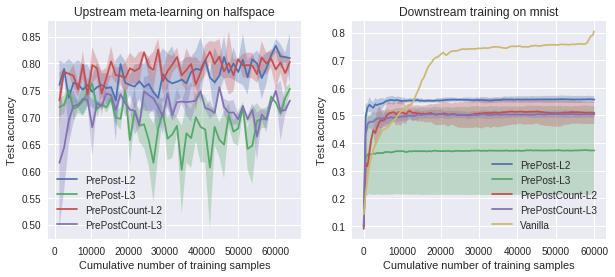

In [13]:
# Plot to compare all.
all_stats_up = [agg_stats_prepost_l2_up, agg_stats_prepost_l3_up,
                agg_stats_prepostcount_l2_up, agg_stats_prepostcount_l3_up,
                None]
all_stats_down = [agg_stats_prepost_l2_down, agg_stats_prepost_l3_down,
                  agg_stats_prepostcount_l2_down, agg_stats_prepostcount_l3_down,
                  stats_vanilla]
labels = ['PrePost-L2', 'PrePost-L3', 'PrePostCount-L2', 'PrePostCount-L3', 'Vanilla']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/generalization_fast_all_' + dataset_up + '_' + dataset_down)